<Figure size 864x576 with 0 Axes>

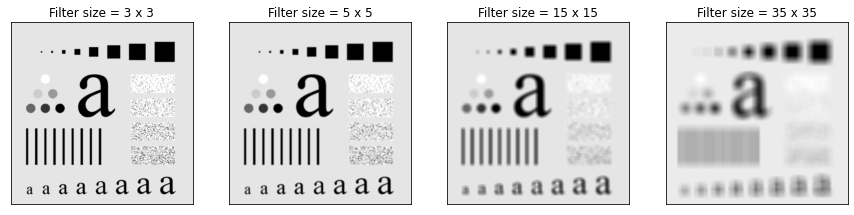

In [5]:
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt

# This function creates the filtering mask
def getAverageFilter(size): 
  filter = np.ones((size, size), dtype=np.float32) 
  filter = filter/(size*size) 
  return filter

# This function applies the filter mask to an image
def applyAveragingFilter(img, filter): 
  img_arr = np.array(img) 
  filter_size = filter.shape[0] 
  copy_arr = np.zeros(img_arr.shape, dtype=np.float32) 
  img_arr = np.pad(img_arr, ((filter_size-1)//2), mode='edge') 
  for x, row in enumerate(copy_arr): 
    for y, pixel in enumerate(row): 
      val = np.sum(img_arr[x:x+filter_size, y:y+filter_size]*filter) 
      copy_arr[x, y] = val
  return copy_arr 

# Loading smoothing image
image_paths = ['smoothing.tif']
count = 0 
plt.figure(figsize=(12, 8)) 
images = [] 
for path in image_paths: 
  images.append(Image.open(path).convert('L')) 
  

# Task 1 - Applying simple averaging filter

# Applying 4 different filters on above loaded images
filters = [3, 5, 15, 35] 
plt.figure(figsize=(15, 12))

count = 1 
for img in images: 
  for filter_size in filters: 
    plt.subplot(3, 4, count) 
    count += 1 
    filter = getAverageFilter(size=filter_size) 
    filtered_img = applyAveragingFilter(img, filter) 
    plt.imshow(np.clip(filtered_img, 0, 255), cmap='gray') 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(f'Filter size = {filter_size} x {filter_size}')
plt.show()

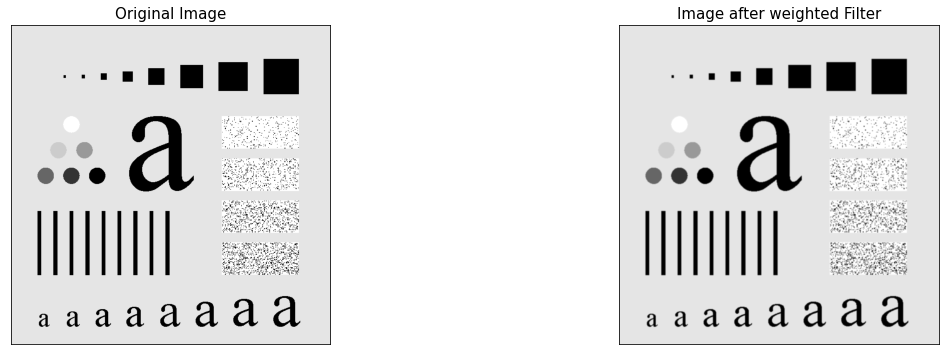

In [6]:
# Applying weighted average filter

count = 1
plt.figure(figsize=(20, 20))
for img in images:
    filter = np.asarray([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ])
    filter = filter/np.sum(filter)
    filtered_image = applyAveragingFilter(img, filter)
    plt.subplot(3, 2, count)
    count += 1
    plt.imshow(img, cmap='gray')
    plt.title("Original Image", fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 2, count)
    count += 1
    plt.title("Image after weighted Filter", fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.clip(filtered_image, 0, 255), cmap='gray')

plt.show()


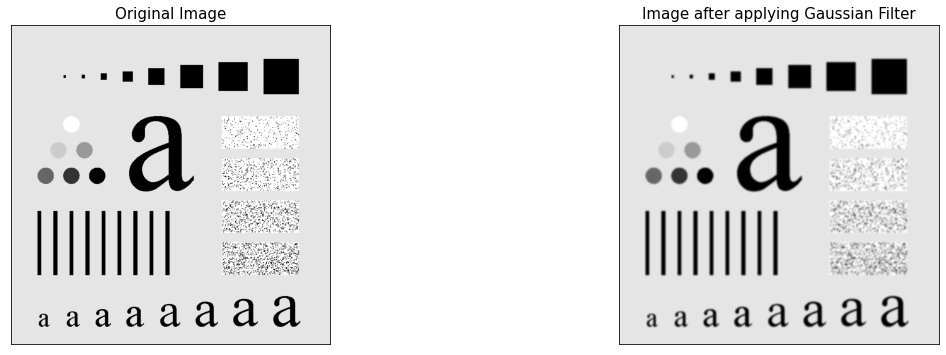

In [8]:
# Task 2 - Applying Gaussian Filter

count = 1
plt.figure(figsize=(20, 20))
for img in images:
    filter = np.asarray([
        [1, 1, 2, 2, 2, 1, 1],
        [1, 2, 2, 4, 2, 2, 1],
        [2, 2, 4, 8, 4, 2, 2],
        [2, 4, 8, 16, 8, 4, 2],
        [2, 2, 4, 8, 4, 2, 2],
        [1, 2, 2, 4, 2, 2, 1],
        [1, 1, 2, 2, 2, 1, 1]
    ])
    filter = filter/np.sum(filter)
    filtered_image = applyAveragingFilter(img, filter)
    plt.subplot(3, 2, count)
    count += 1
    plt.imshow(img, cmap='gray')
    plt.title("Original Image", fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(3, 2, count)
    count += 1
    plt.title("Image after applying Gaussian Filter", fontsize=15)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.clip(filtered_image, 0, 255), cmap='gray')

plt.show()


<Figure size 864x576 with 0 Axes>

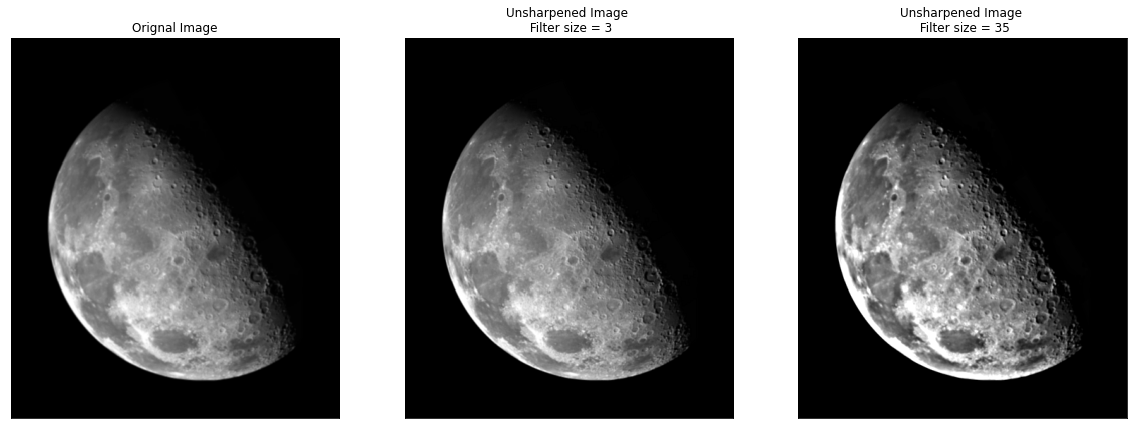

In [12]:
# Task 3 - Performing Unsharpening

path = "unsharpmasking.tif"
count = 0 
plt.figure(figsize=(12, 8))  
images.append(Image.open(path).convert('L')) 

img = images[1]
filters = [3, 35]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.xticks([])
plt.yticks([])
plt.title("Orignal Image")
plt.imshow(img, cmap='gray')
count = 2

for size in filters:
    filter = getAverageFilter(size)
    smooth_img = applyAveragingFilter(img, filter)
    mask = img - smooth_img
    unsharp = img + mask
    plt.subplot(1, 3, count)
    plt.xticks([])
    plt.yticks([])
    count += 1
    plt.imshow(np.clip(unsharp, 0, 255), cmap='gray')
    plt.title(f'Unsharpened Image \n Filter size = {size}')



<Figure size 864x576 with 0 Axes>

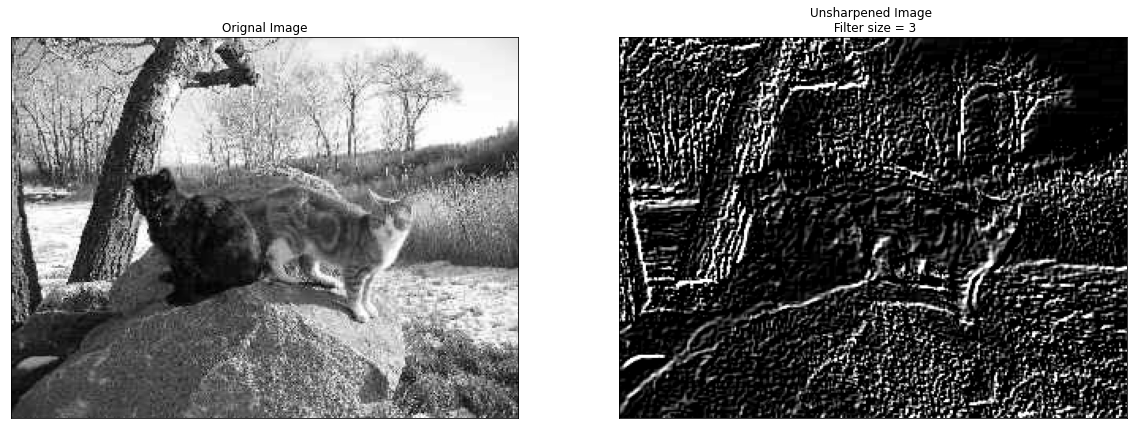

In [13]:
# Task 4 - Performing Sharpening

path = "two_cats.jpg"
count = 0 
plt.figure(figsize=(12, 8))  
images.append(Image.open(path).convert('L')) 

img = images[2]
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.xticks([])
plt.yticks([])
plt.title("Orignal Image")
plt.imshow(img, cmap='gray')

size = 3
horizontal_filter = np.asarray([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

vertical_filter = np.asarray([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

# get horizontal edges
horizontal_img = applyAveragingFilter(img, horizontal_filter)
# get vertical edges
vertical_img = applyAveragingFilter(img, vertical_filter)

plt.subplot(1, 2, 2)
plt.xticks([])
plt.yticks([])

sharpened_img = np.clip(vertical_img + horizontal_img, 0, 255)

plt.imshow(sharpened_img, cmap='gray')
plt.title(f'Unsharpened Image \n Filter size = {size}')
plt.show()
